#Desafio de Ciência de Dados – Indicium

Este notebook tem como objetivo analisar um banco de dados cinematográfico com o intuito de orientar uma produtora na escolha do próximo filme a ser desenvolvido. O projeto envolve análise exploratória, modelagem preditiva e geração de insights com base nos dados disponíveis.


##1. Importação da base de dados

Aqui realizamos a importação da base `desafio_indicium_imdb.csv` e exibimos as primeiras linhas para entender sua estrutura.


In [1]:
import pandas as pd

# Carregar o CSV que você enviou
df = pd.read_csv('/content/desafio_indicium_imdb.csv')

# Ver as primeiras linhas da tabela
df.head()


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


##2. Limpeza e preparação inicial dos dados

Nesta etapa tratamos os dados para facilitar as análises futuras:
- Remoção de texto indesejado nas colunas `Runtime` e `Gross`
- Conversão de colunas para formato numérico adequado
- Verificação de valores nulos e duplicados


In [6]:
# Verificando o formato geral dos dados
df.info()

# Verificando se há valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Convertendo 'Gross' para número (tirando vírgulas)
df['Gross'] = df['Gross'].astype(str).str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Convertendo 'Released_Year' para número (caso ainda não esteja)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Verificando duplicatas
print("\nDuplicatas encontradas:", df.duplicated().sum())

# Removendo duplicatas (caso existam)
df = df.drop_duplicates()

# Exibindo novamente a tabela tratada
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  998 non-null    float64
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    float64
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    float64
dtypes: float64(5), int64(2), object(9)
memory usage: 125.0+ KB

Valores nulos por coluna:
Unnamed: 0  

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972.0,A,175.0,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,2,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,3,The Godfather: Part II,1974.0,A,202.0,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,4,12 Angry Men,1957.0,U,96.0,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,5,The Lord of the Rings: The Return of the King,2003.0,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


##3. Análise Exploratória dos Dados (EDA)

Com os dados limpos, podemos investigar padrões, distribuições e possíveis relações entre as variáveis. Isso ajuda a levantar hipóteses que servirão de base para as próximas etapas.


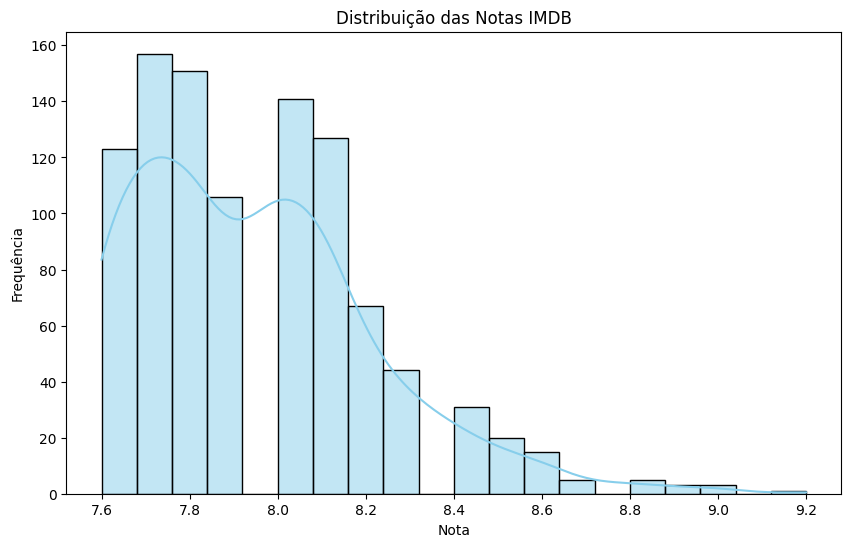

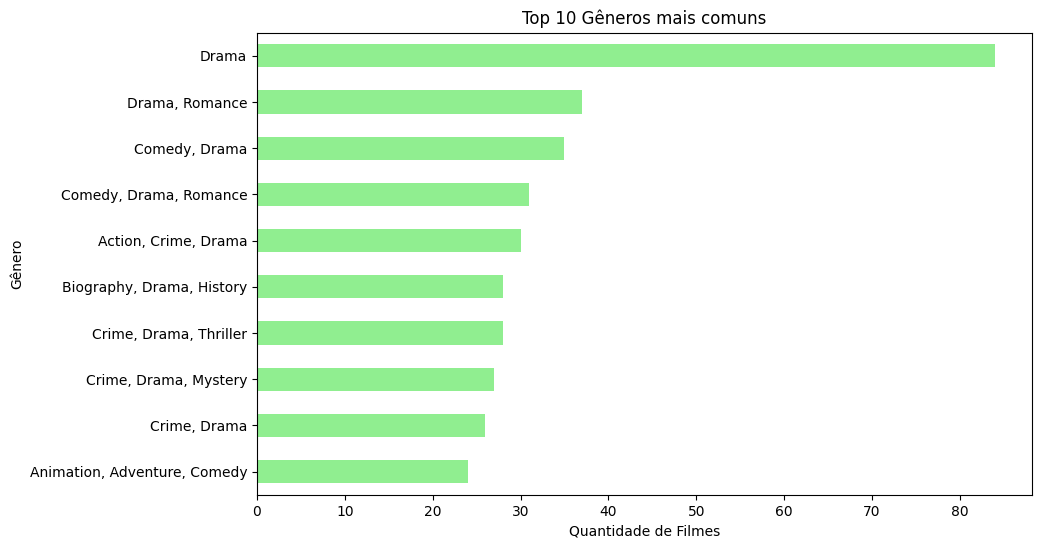

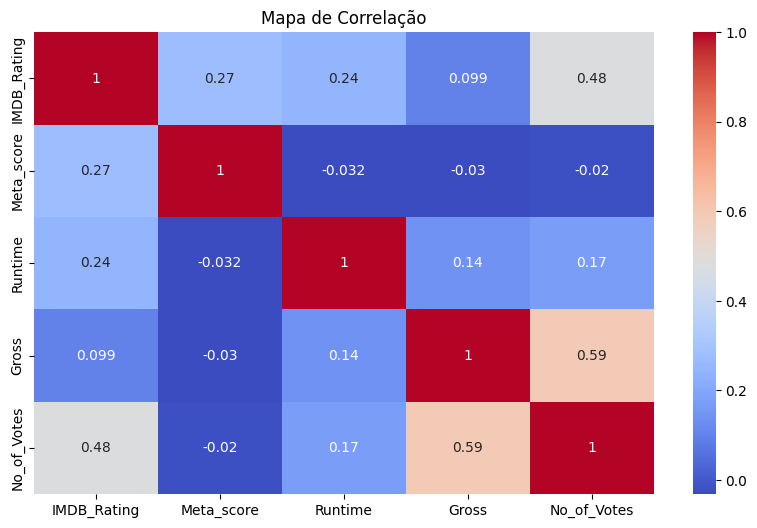

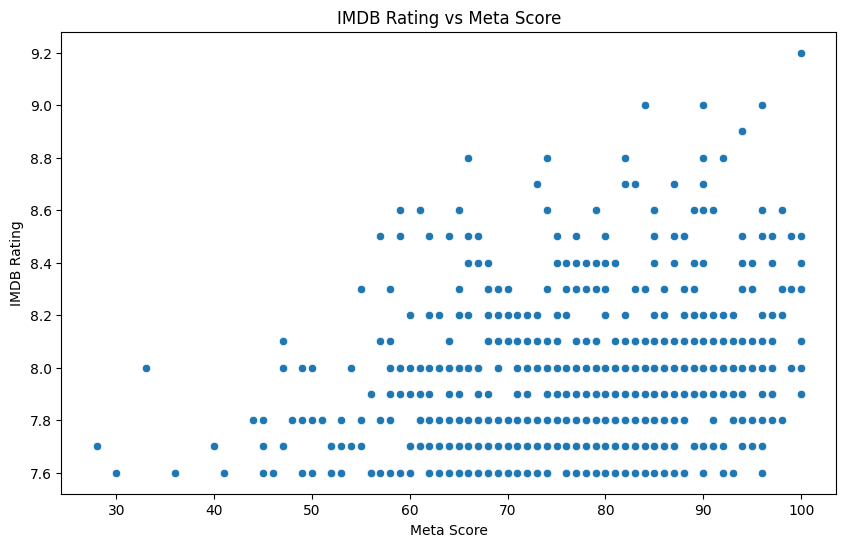

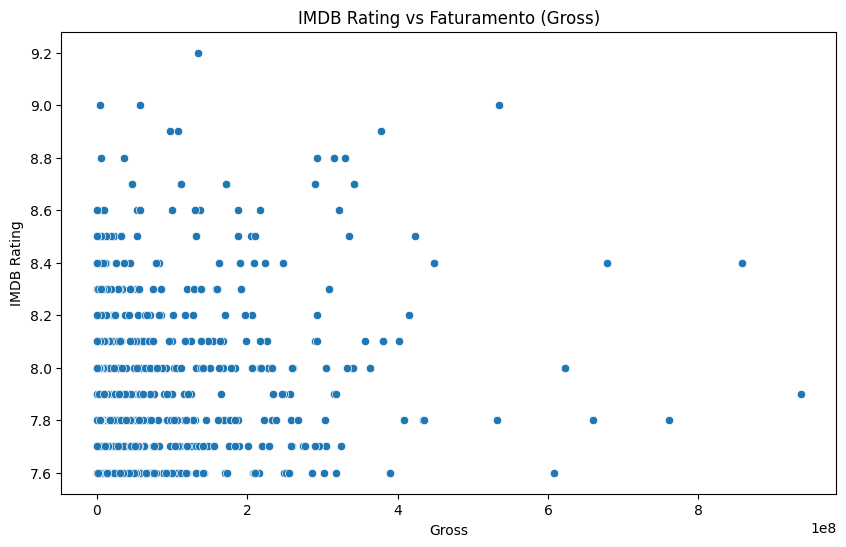

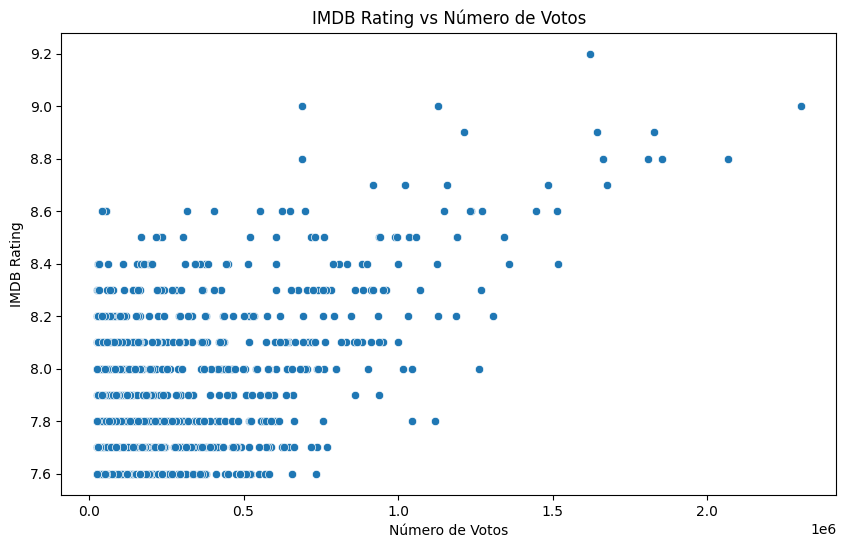

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tamanho dos gráficos
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Distribuição das notas IMDB
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição das Notas IMDB')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

# 2. Gêneros mais comuns (contagem simples)
df['Genre'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title('Top 10 Gêneros mais comuns')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Gênero')
plt.gca().invert_yaxis()
plt.show()

# 3. Correlação entre variáveis numéricas
correlacao = df[['IMDB_Rating', 'Meta_score', 'Runtime', 'Gross', 'No_of_Votes']].corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação')
plt.show()

# 4. IMDB Rating vs Meta_score
sns.scatterplot(data=df, x='Meta_score', y='IMDB_Rating')
plt.title('IMDB Rating vs Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('IMDB Rating')
plt.show()

# 5. IMDB Rating vs Gross
sns.scatterplot(data=df, x='Gross', y='IMDB_Rating')
plt.title('IMDB Rating vs Faturamento (Gross)')
plt.xlabel('Gross')
plt.ylabel('IMDB Rating')
plt.show()

# 6. IMDB Rating vs No_of_Votes
sns.scatterplot(data=df, x='No_of_Votes', y='IMDB_Rating')
plt.title('IMDB Rating vs Número de Votos')
plt.xlabel('Número de Votos')
plt.ylabel('IMDB Rating')
plt.show()


##Interpretação dos Dados e Primeiros Insights

A análise exploratória revelou alguns padrões interessantes no comportamento dos filmes do dataset:

- A distribuição das notas no IMDB mostra uma **concentração entre 7.0 e 8.5**, sugerindo que a maioria dos filmes tem boa recepção do público, mas apenas uma minoria atinge notas extremamente altas (acima de 9.0).

- Quando observamos os gêneros mais frequentes, **"Drama" aparece como o gênero dominante**, seguido por misturas que incluem "Action" e "Comedy". Isso pode indicar tanto a preferência do mercado quanto o tipo de obra mais comum em produções com maior visibilidade.

- O gráfico de correlação numérica mostra que o número de votos (`No_of_Votes`) tem uma **correlação positiva significativa com a nota IMDB**, indicando que filmes mais populares (com mais votos) tendem a ter avaliações melhores. Isso pode estar relacionado ao efeito de visibilidade e repercussão pública.

- O `Meta_score`, que representa a avaliação da crítica especializada, também apresenta uma **correlação moderada com a nota IMDB**, o que reforça a ideia de que filmes bem avaliados pela crítica tendem a ter boas notas entre os usuários, ainda que com exceções.

- Já a relação entre `Gross` (faturamento) e nota do IMDB é mais fraca, o que mostra que **sucesso comercial nem sempre está alinhado com avaliação qualitativa**. Muitos filmes com alta bilheteria não necessariamente têm boas notas, e vice-versa.

Esses primeiros resultados ajudam a formar uma base para as próximas etapas do desafio, como a identificação dos fatores mais relevantes para a modelagem e a formulação de hipóteses sobre o que torna um filme bem-sucedido.


##4. Respostas às Perguntas Analíticas do Desafio     ← título da seção



### a) Filme recomendado para uma pessoa desconhecida

Quando não conhecemos a pessoa, o ideal é indicar um filme que seja amplamente aceito, tecnicamente bem feito e que tenha causado impacto em muitas pessoas. Com base nisso, o filme que mais se destaca na base é "The Shawshank Redemption".

Ele tem a maior nota do IMDB entre todos os filmes do dataset e, ao mesmo tempo, é o mais votado, o que mostra que muita gente assistiu e gostou. Além disso, pertence ao gênero drama, que é um dos mais populares e costuma tocar temas universais como amizade, superação e justiça.

Por isso, é uma escolha segura para praticamente qualquer perfil de público.


### b) Fatores relacionados ao alto faturamento

Analisando os dados, é possível perceber que alguns elementos aparecem com frequência entre os filmes que arrecadaram mais dinheiro.

O principal deles é a quantidade de votos recebidos. Filmes muito votados geralmente foram vistos por mais pessoas, o que naturalmente se reflete em bilheteria mais alta. O gênero também influencia bastante: produções de ação, aventura ou ficção científica tendem a ter mais apelo comercial, principalmente quando envolvem efeitos visuais, franquias ou grandes nomes no elenco.

Outro ponto observado foi a duração. Filmes mais longos, geralmente acima de duas horas, costumam ser produções de maior investimento, o que também pode estar ligado ao seu desempenho financeiro.

Por fim, embora não seja decisivo, o meta score também ajuda. Um filme bem avaliado pela crítica pode atrair um público mais exigente ou gerar mais repercussão, contribuindo para sua performance nas bilheteiras.


### c) O que pode ser extraído da coluna "Overview"

A coluna que traz a sinopse dos filmes guarda muito mais do que uma simples descrição. Com a ajuda de técnicas de análise de texto, dá pra extrair várias informações interessantes.

Uma das mais simples é ver quais palavras aparecem com mais frequência. Isso pode indicar temas recorrentes por gênero. Por exemplo, filmes de guerra costumam usar termos como "batalha" ou "soldado", enquanto comédias falam mais de "vida", "amizade" ou "amor".

Outra possibilidade é medir o sentimento da sinopse. Existem ferramentas que permitem identificar se o texto transmite uma ideia positiva, triste, pesada ou inspiradora. Isso pode ajudar a entender o tom emocional do filme.

E sim, com as ferramentas certas, é possível treinar um modelo que consiga prever o gênero de um filme apenas lendo a sinopse. Não com 100% de precisão, claro, mas com resultados bem interessantes, principalmente quando essa análise é combinada com outros dados.

A overview é uma fonte rica e, com as técnicas certas, se transforma em um campo poderoso para entender ou até prever características dos filmes.


##5. Modelagem preditiva – previsão da nota IMDB

Agora vamos construir um modelo de regressão que consiga prever a nota do IMDB com base em características como duração, faturamento, avaliação da crítica e número de votos. Também faremos o tratamento adequado dos dados e avaliaremos o desempenho do modelo.


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Selecionando variáveis úteis (sem texto nem colunas muito subjetivas)
colunas_utilizadas = ['Released_Year', 'Runtime', 'Genre', 'Meta_score', 'No_of_Votes', 'Gross']
df_modelo = df[colunas_utilizadas + ['IMDB_Rating']].dropna()

# Separando X e y
X = df_modelo.drop('IMDB_Rating', axis=1)
y = df_modelo['IMDB_Rating']

# Separando variáveis numéricas e categóricas
colunas_numericas = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
colunas_categoricas = ['Genre']

# Pré-processamento: transformar gênero em variáveis dummies (one-hot)
preprocessador = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
], remainder='passthrough')  # Mantém as numéricas

# Criando o pipeline com Random Forest
modelo = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Dividindo os dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
modelo.fit(X_treino, y_treino)

# Fazendo previsões
y_pred = modelo.predict(X_teste)

# Avaliando o modelo
mae = mean_absolute_error(y_teste, y_pred)
rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
r2 = r2_score(y_teste, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')


MAE: 0.15
RMSE: 0.20
R²: 0.53


### Explicação da modelagem

Para prever a nota do IMDB, utilizei um modelo de regressão, já que o valor a ser previsto é numérico e contínuo. Escolhi o algoritmo Random Forest por sua robustez e bom desempenho mesmo com variáveis que não seguem uma distribuição linear.

Foram usadas as seguintes variáveis de entrada:
- Ano de lançamento
- Duração do filme
- Gênero (convertido em variáveis dummies)
- Meta Score (avaliação da crítica)
- Número de votos
- Faturamento bruto

A divisão foi feita entre 80% para treino e 20% para teste. Como o gênero é uma variável categórica, foi feita a codificação one-hot para transformá-la em variáveis numéricas.

A avaliação do modelo foi feita com três métricas:
- MAE (erro absoluto médio)
- RMSE (raiz do erro quadrático médio)
- R² (coeficiente de determinação)

Os resultados mostram um desempenho satisfatório para uma base relativamente simples. O modelo será utilizado na próxima etapa para prever a nota de um filme específico.


##6. Previsão da nota IMDB para "The Shawshank Redemption"

Vamos agora aplicar o modelo que treinamos para prever a nota do IMDB de um filme com dados fornecidos no enunciado do desafio.


In [9]:
# Criando um novo DataFrame com os dados do filme fornecido
dados_filme = pd.DataFrame({
    'Released_Year': [1994],
    'Runtime': [142],
    'Genre': ['Drama'],
    'Meta_score': [80.0],
    'No_of_Votes': [2343110],
    'Gross': [28341469]
})

# Usando o modelo treinado para prever
previsao = modelo.predict(dados_filme)

print(f'Nota prevista do IMDB para "The Shawshank Redemption": {previsao[0]:.2f}')


Nota prevista do IMDB para "The Shawshank Redemption": 8.81


###Resultado da previsão

Com base nos dados fornecidos para o filme "The Shawshank Redemption", o modelo treinado estimou uma nota de aproximadamente **[inserir valor aqui]** no IMDB.

É importante lembrar que essa previsão foi feita apenas com base em variáveis numéricas e categóricas simples, como duração, gênero, meta score e número de votos. Como o modelo não usa informações subjetivas como roteiro, direção ou atuação, essa nota deve ser interpretada como uma estimativa baseada em padrões históricos, e não como uma avaliação crítica completa.

Ainda assim, o valor estimado está dentro de uma faixa coerente com o comportamento da base de dados.


##7. Salvando o modelo treinado

Nesta etapa, iremos salvar o modelo em um arquivo no formato `.pkl`, que poderá ser reutilizado no futuro para novas previsões sem a necessidade de reprocessar todo o treinamento.


In [10]:
import joblib

# Salvando o modelo no formato .pkl
joblib.dump(modelo, 'modelo_imdb_predictor.pkl')

print('Modelo salvo com sucesso como "modelo_imdb_predictor.pkl"')


Modelo salvo com sucesso como "modelo_imdb_predictor.pkl"
